In [4]:
import numpy as np
from miniflow import Model, Dense, FlattenLayer, Conv2D, MaxPooling2D
from miniflow.util import label2onehot
import time
import os
# 上升两级到项目根目录
project_root = os.path.join(os.getcwd(), '..', '..')
os.chdir(project_root)
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: /home/yufeng/Workspace/miniflow


In [5]:
x_train_path = './data/mnist_data/mnist_x_train.npy'
y_train_path = './data/mnist_data/mnist_y_train.npy'
x_test_path = './data/mnist_data/mnist_x_test.npy'
y_test_path = './data/mnist_data/mnist_y_test.npy'

In [6]:
# Load training set
x_train = np.load(x_train_path)
y_train = np.load(y_train_path)

# Load test set
x_test = np.load(x_test_path)
y_test = np.load(y_test_path)

# Normalize and reshape
x_train = (x_train / 255.0).reshape(-1, 28, 28, 1)
x_test = (x_test / 255.0).reshape(-1, 28, 28, 1)

# Convert y_train to OneHot
# 希望可以自己判断 one-hot 类别的数量
y_train = label2onehot(y_train, units=10)

In [7]:
model = Model([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), input_shape=(26, 26, 32)),
    Conv2D(64, (3, 3), activation='relu', input_shape=(13, 13, 32)),
    MaxPooling2D((2, 2), input_shape=(11, 11, 64)),
    FlattenLayer(input_shape=(5, 5, 64)),
    Dense(64, activation='relu', input_shape=1600),
    Dense(10, activation='softmax', input_shape=64)
], name="my_model", cost="softmax")

In [8]:

# load weights from file
# model.layers_array[0].set_weights(
#     np.load("./weights/simple_CNN_weights/conv2d_3x3_32_weights.npy"))
# model.layers_array[0].set_bias(
#     np.load("./weights/simple_CNN_weights/conv2d_3x3_32_biases.npy"))

# model.layers_array[2].set_weights(
#     np.load("./weights/simple_CNN_weights/conv2d_3x3_64_weights.npy"))
# model.layers_array[2].set_bias(
#     np.load("./weights/simple_CNN_weights/conv2d_3x3_64_biases.npy"))

# model.layers_array[5].set_weights(np.load("./weights/simple_CNN_weights/dense_64_weights.npy").T,
#                                   np.load("./weights/simple_CNN_weights/dense_64_biases.npy"))
# model.layers_array[6].set_weights(np.load("./weights/simple_CNN_weights/dense_10_weights.npy").T,
#                                   np.load("./weights/simple_CNN_weights/dense_10_biases.npy"))

model.set_rand_weight(method='He')

In [19]:

model.compile(optimizer='adam',
              alpha_decay=True,
              show_summary=False,
              plot_loss=False,
              loss_method="categorical_crossentropy")

model.summary()

Model Summary
Layer (type)                   Weight Shape         Output Shape         Param #              Activation
Conv2D (Conv2D)                (3, 3, 1, 32)        Unknown              320                  relu      
MaxPooling2D (MaxPooling2D)    No weights           (13, 13, 32)         0                    None      
Conv2D (Conv2D)                (3, 3, 32, 64)       Unknown              18496                relu      
MaxPooling2D (MaxPooling2D)    No weights           (5, 5, 64)           0                    None      
Unnamed Layer (FlattenLayer)   No weights           1600                 0                    None      
Dense (Dense)                  (64, 1600)           Unknown              102464               relu      
Dense (Dense)                  (10, 64)             Unknown              650                  softmax   
Total params: 121930


In [ ]:
train_example_num = 1000
model.fit(x_train[:train_example_num], y_train[:train_example_num],
          learning_rate=5e-5,
          epochs=10,
          batch_size=8,
          b1=0.9)

In [9]:
start_time = time.time()
predictions = model.predict(x_test[:10])
end_time = time.time()

print(f"Prediction time: {end_time - start_time:.2f} seconds")
predictions_labels = np.argmax(predictions, axis=1)
# 计算准确率
accuracy = np.mean(predictions_labels == y_test[:10])
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Prediction time: 0.35 seconds
Test Accuracy: 100.00%


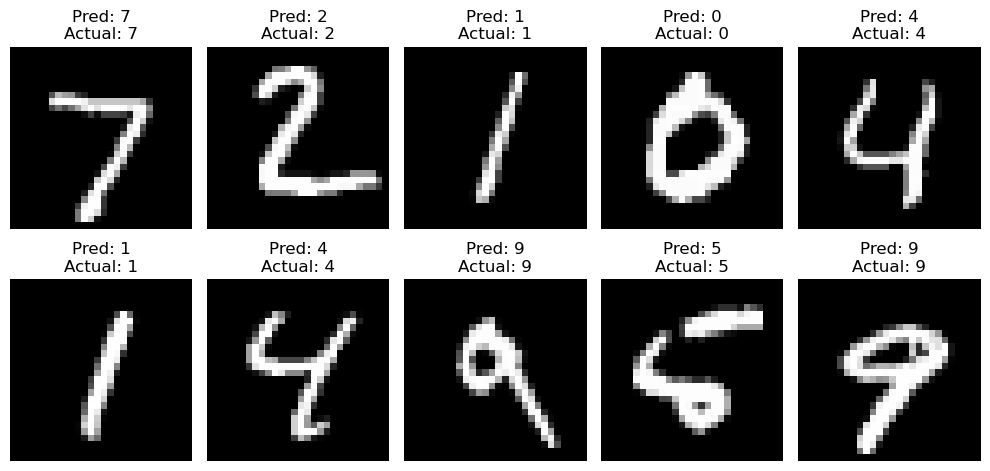

In [8]:
import matplotlib.pyplot as plt


# 绘制前十个样本的图像及其预测和实际标签
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions_labels[i]}\nActual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()